In [2]:
pip install pandas numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# Load the dataset
df = pd.read_csv('fraudTest.csv')

In [4]:
# Display the first few rows of the dataframe
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
df.shape

(555719, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [8]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [9]:
# Drop unnecessary columns
df.drop(columns=['Unnamed: 0'], inplace=True)

In [10]:
# check for duplicate values
df.duplicated().sum()

0

In [11]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(555719, 22)

In [14]:
df['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

# Data Preprocessing

In [15]:
# Fill missing values (if any) - example: fill numeric columns with mean and categorical columns with mode
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column].fillna(df[column].mean(), inplace=True)

for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)



In [16]:

# Encode categorical variables
categorical_cols = ['merchant', 'category', 'first', 'last', 'gender', 'city', 'state', 'job']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [17]:
# Example feature engineering: extract features from date/time columns
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['trans_year'] = df['trans_date_trans_time'].dt.year
df['trans_month'] = df['trans_date_trans_time'].dt.month
df['trans_day'] = df['trans_date_trans_time'].dt.day
df['trans_hour'] = df['trans_date_trans_time'].dt.hour

In [18]:
# Drop the original date/time column if not needed
df.drop(['trans_date_trans_time'], axis=1, inplace=True)

In [19]:
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_day,trans_hour
0,2291163933867244,319,10,2.86,151,115,1,351 Darlene Green,157,39,...,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020,6,21,12
1,3573030041201292,591,10,29.84,163,457,0,3638 Marsh Union,16,43,...,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020,6,21,12
2,3598215285024754,611,5,41.28,24,249,0,9333 Valentine Point,61,33,...,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020,6,21,12
3,3591919803438423,222,9,60.05,42,457,1,32941 Krystal Mill Apt. 552,764,8,...,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020,6,21,12
4,3526826139003047,292,13,3.19,247,261,1,5783 Evan Roads Apt. 465,247,21,...,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020,6,21,12


In [20]:
df.dtypes

cc_num           int64
merchant         int32
category         int32
amt            float64
first            int32
last             int32
gender           int32
street          object
city             int32
state            int32
zip              int64
lat            float64
long           float64
city_pop         int64
job              int32
dob             object
trans_num       object
unix_time        int64
merch_lat      float64
merch_long     float64
is_fraud         int64
trans_year       int32
trans_month      int32
trans_day        int32
trans_hour       int32
dtype: object

In [23]:
# Display the cleaned dataset
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_day,trans_hour
0,2291163933867244,319,10,2.86,151,115,1,351 Darlene Green,157,39,...,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020,6,21,12
1,3573030041201292,591,10,29.84,163,457,0,3638 Marsh Union,16,43,...,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020,6,21,12
2,3598215285024754,611,5,41.28,24,249,0,9333 Valentine Point,61,33,...,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020,6,21,12
3,3591919803438423,222,9,60.05,42,457,1,32941 Krystal Mill Apt. 552,764,8,...,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020,6,21,12
4,3526826139003047,292,13,3.19,247,261,1,5783 Evan Roads Apt. 465,247,21,...,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020,6,21,12


In [24]:
df.dtypes

cc_num           int64
merchant         int64
category         int64
amt            float64
first            int64
last             int64
gender           int64
street          object
city             int64
state            int64
zip              int64
lat            float64
long           float64
city_pop         int64
job              int64
dob             object
trans_num       object
unix_time        int64
merch_lat      float64
merch_long     float64
is_fraud         int64
trans_year       int32
trans_month      int32
trans_day        int32
trans_hour       int32
dtype: object

# EDA

In [25]:
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_day,trans_hour
0,2291163933867244,319,10,2.86,151,115,1,351 Darlene Green,157,39,...,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020,6,21,12
1,3573030041201292,591,10,29.84,163,457,0,3638 Marsh Union,16,43,...,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020,6,21,12
2,3598215285024754,611,5,41.28,24,249,0,9333 Valentine Point,61,33,...,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020,6,21,12
3,3591919803438423,222,9,60.05,42,457,1,32941 Krystal Mill Apt. 552,764,8,...,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020,6,21,12
4,3526826139003047,292,13,3.19,247,261,1,5783 Evan Roads Apt. 465,247,21,...,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020,6,21,12


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

Distribution of Fraudulent and Non-Fraudulent Transactions (Pie Chart)

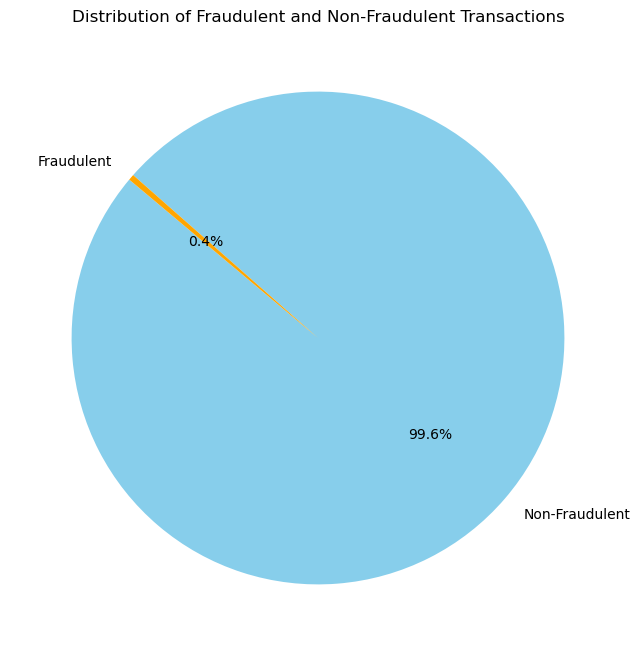

In [28]:
# Pie chart for the distribution of fraudulent and non-fraudulent transactions
fraud_counts = df['is_fraud'].value_counts()
labels = ['Non-Fraudulent', 'Fraudulent']

plt.figure(figsize=(8, 8))
plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.show()

Fraud by Gender (Pie Chart)

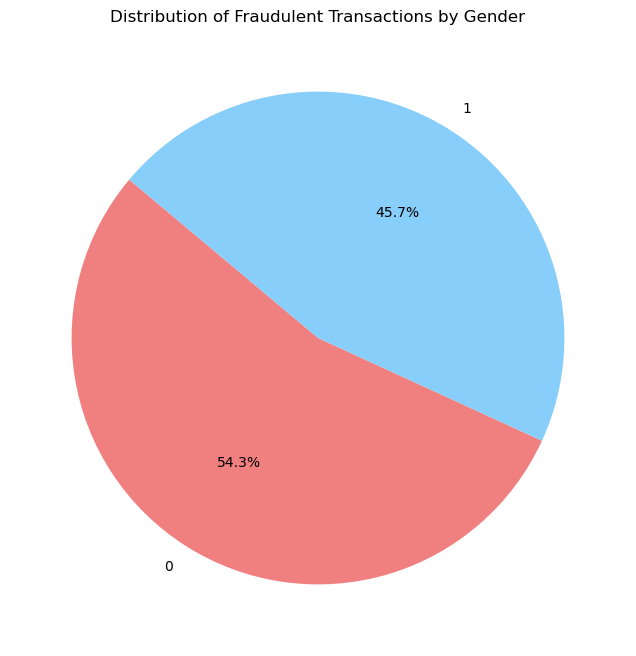

In [29]:
# Pie chart for the distribution of fraudulent transactions by gender
gender_fraud_counts = df[df['is_fraud'] == 1]['gender'].value_counts()
gender_labels = gender_fraud_counts.index

plt.figure(figsize=(8, 8))
plt.pie(gender_fraud_counts, labels=gender_labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Fraudulent Transactions by Gender')
plt.show()


Fraud by Job Category (Pie Chart)

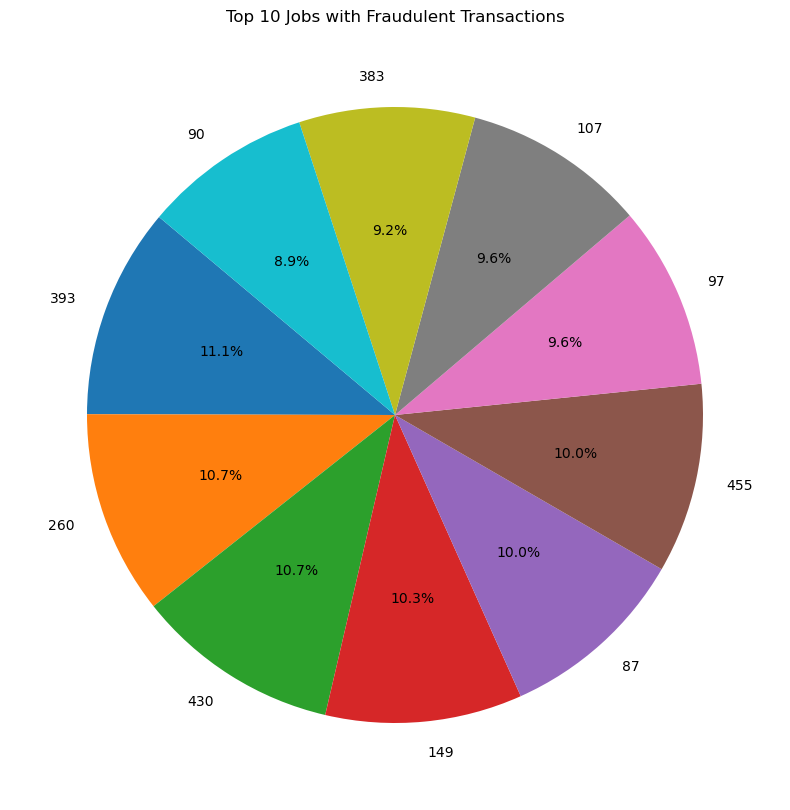

In [30]:
# Pie chart for the distribution of fraudulent transactions by job
job_fraud_counts = df[df['is_fraud'] == 1]['job'].value_counts().head(10)  # Top 10 jobs
job_labels = job_fraud_counts.index

plt.figure(figsize=(10, 10))
plt.pie(job_fraud_counts, labels=job_labels, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Jobs with Fraudulent Transactions')
plt.show()


Fraud by Merchant Category (Pie Chart)

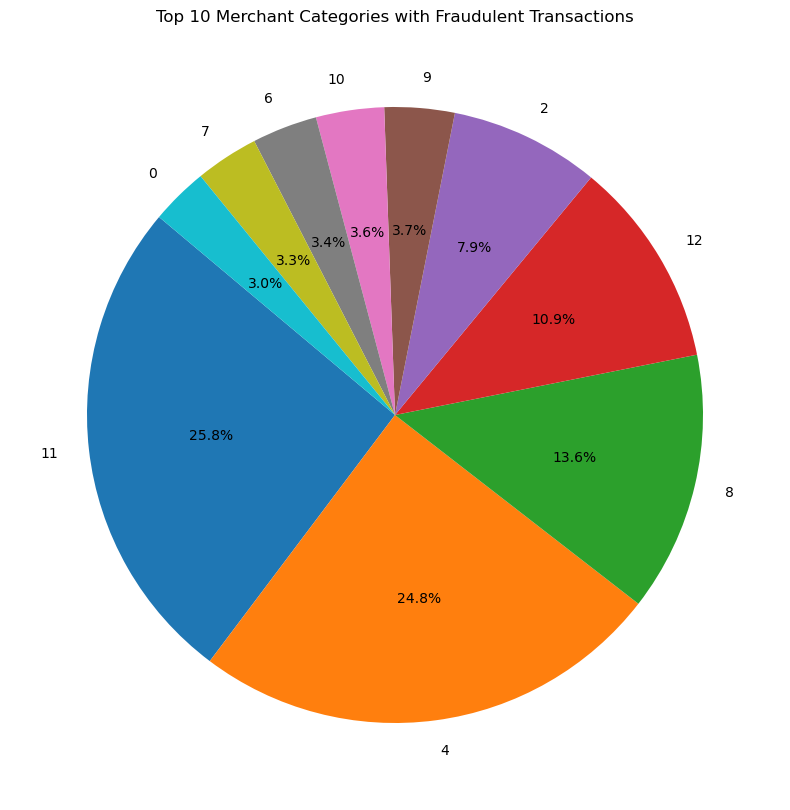

In [31]:
# Pie chart for the distribution of fraudulent transactions by merchant category
merchant_fraud_counts = df[df['is_fraud'] == 1]['category'].value_counts().head(10)  # Top 10 merchant categories
merchant_labels = merchant_fraud_counts.index

plt.figure(figsize=(10, 10))
plt.pie(merchant_fraud_counts, labels=merchant_labels, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Merchant Categories with Fraudulent Transactions')
plt.show()


Fraud by City Population (Histogram)


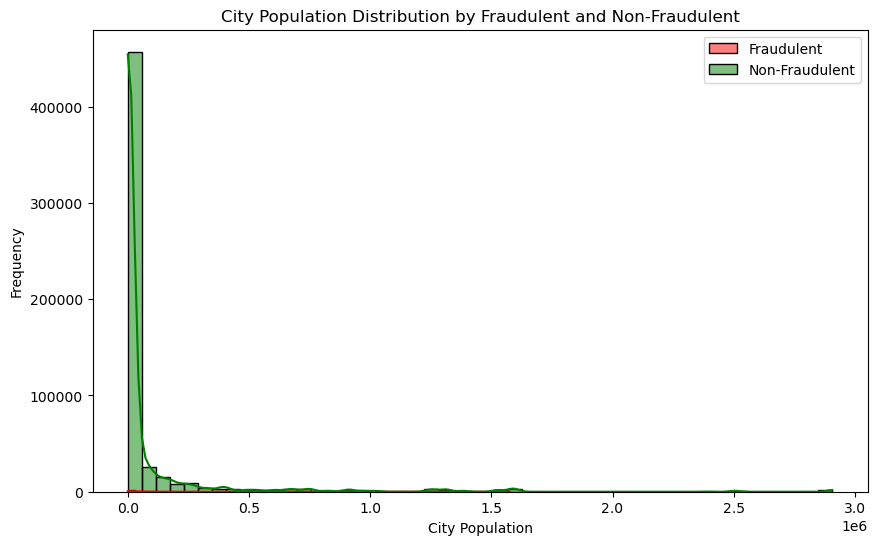

In [32]:
# Histogram of city population for fraudulent and non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.histplot(df[df['is_fraud'] == 1]['city_pop'], bins=50, kde=True, color='red', label='Fraudulent')
sns.histplot(df[df['is_fraud'] == 0]['city_pop'], bins=50, kde=True, color='green', label='Non-Fraudulent')
plt.title('City Population Distribution by Fraudulent and Non-Fraudulent')
plt.xlabel('City Population')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Transaction Amount Distribution (Histogram)

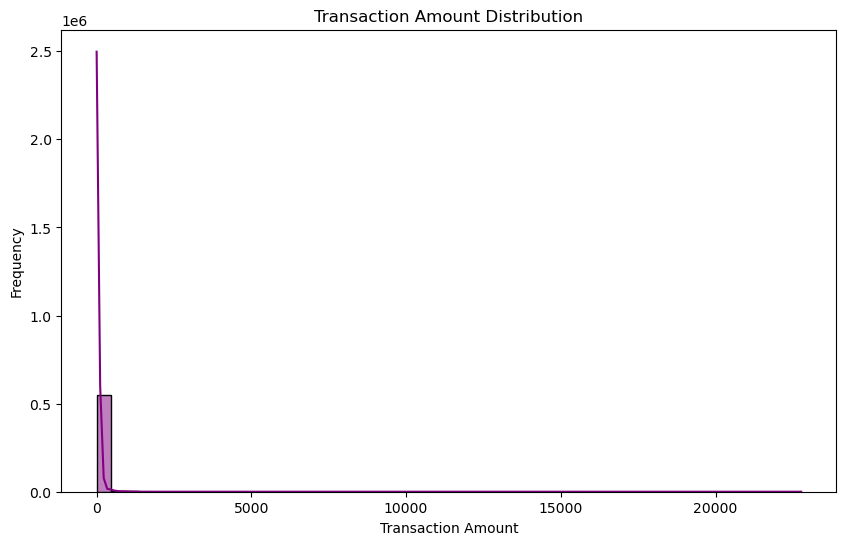

In [33]:
# Histogram for transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['amt'], bins=50, kde=True, color='purple')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


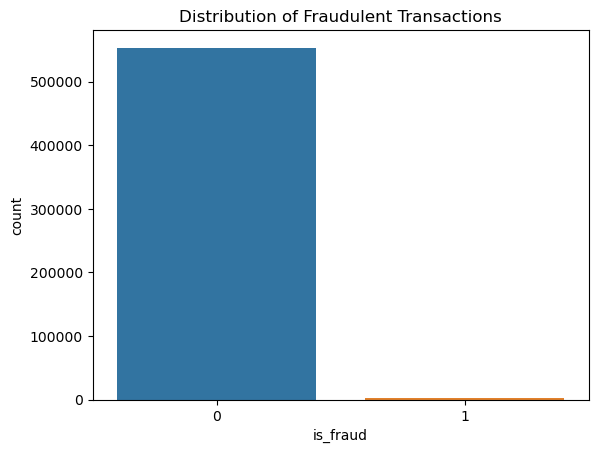

In [34]:
# Distribution of the target variable
sns.countplot(x='is_fraud', data=df)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

 Fraud by Transaction Time (Histogram)

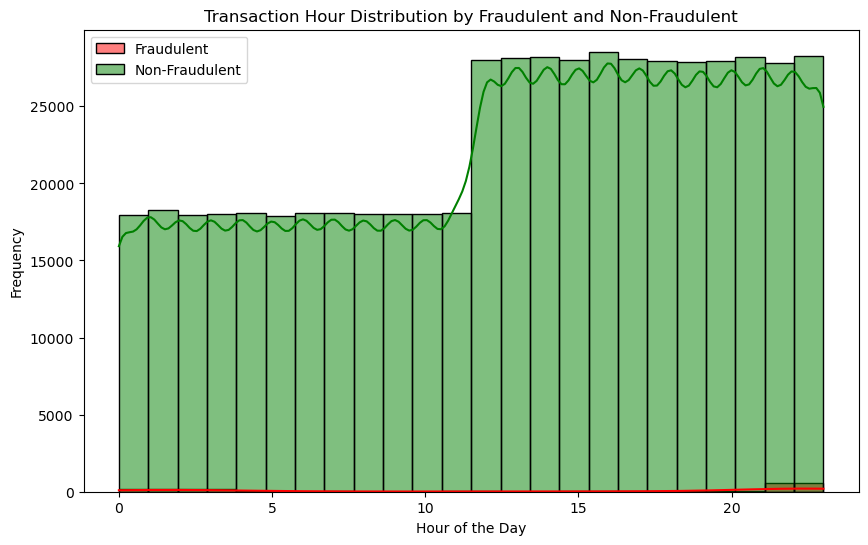

In [35]:
# Histogram of transaction hours for fraudulent and non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.histplot(df[df['is_fraud'] == 1]['trans_hour'], bins=24, kde=True, color='red', label='Fraudulent')
sns.histplot(df[df['is_fraud'] == 0]['trans_hour'], bins=24, kde=True, color='green', label='Non-Fraudulent')
plt.title('Transaction Hour Distribution by Fraudulent and Non-Fraudulent')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [36]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

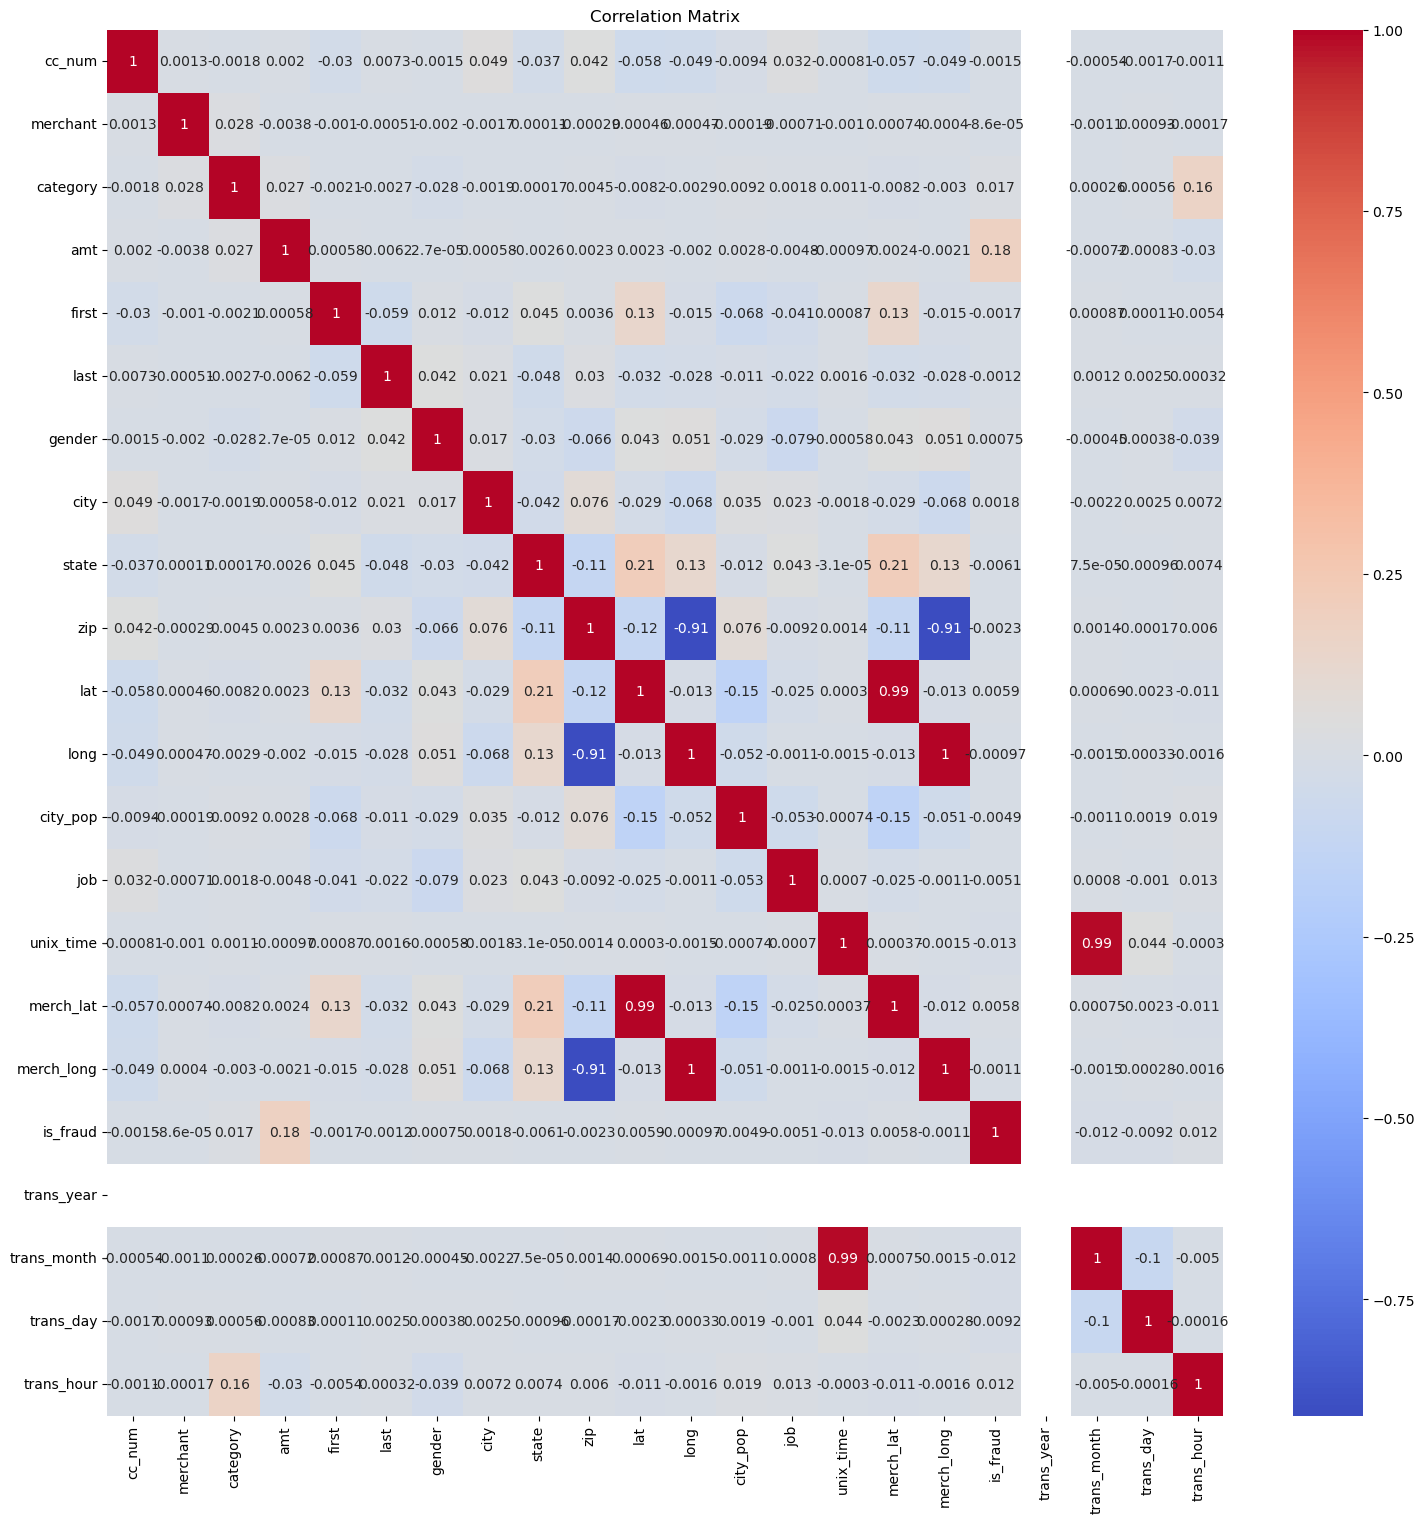

In [37]:
# Correlation matrix
corr_matrix = numeric_df.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering

In [38]:
df.isnull().sum()

cc_num         0
merchant       0
category       0
amt            0
first          0
last           0
gender         0
street         0
city           0
state          0
zip            0
lat            0
long           0
city_pop       0
job            0
dob            0
trans_num      0
unix_time      0
merch_lat      0
merch_long     0
is_fraud       0
trans_year     0
trans_month    0
trans_day      0
trans_hour     0
dtype: int64

In [39]:
# distribution of legit transactions & fraudulent transactions
df['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [40]:
# separating the data for analysis
legit = df[df.is_fraud == 0]
fraud = df[df.is_fraud == 1]

In [41]:
print(legit.shape)
print(fraud.shape)

(553574, 25)
(2145, 25)


In [42]:
# statistical measures of the data
legit.amt.describe()

count    553574.000000
mean         67.614408
std         152.471931
min           1.000000
25%           9.600000
50%          47.150000
75%          82.620000
max       22768.110000
Name: amt, dtype: float64

In [43]:
fraud.amt.describe()

count    2145.000000
mean      528.356494
std       392.747594
min         1.780000
25%       214.510000
50%       371.940000
75%       907.770000
max      1320.920000
Name: amt, dtype: float64

In [44]:
num_df = df.select_dtypes(include=[float, int])

In [45]:
# Split the data into features and target
X = num_df.drop('is_fraud', axis=1)
y = num_df['is_fraud']

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Bulding

Naive Bayes Models

In [48]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [49]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred_gnb = gnb.predict(X_test_scaled)
print('GaussianNB')
print(classification_report(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print('Accuracy:', accuracy_score(y_test, y_pred_gnb))

GaussianNB
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    110718
           1       0.26      0.54      0.35       426

    accuracy                           0.99    111144
   macro avg       0.63      0.77      0.68    111144
weighted avg       1.00      0.99      0.99    111144

[[110078    640]
 [   196    230]]
Accuracy: 0.9924782264449723


In [50]:
# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train_scaled, y_train)
y_pred_bnb = bnb.predict(X_test_scaled)
print('BernoulliNB')
print(classification_report(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))
print('Accuracy:', accuracy_score(y_test, y_pred_bnb))

BernoulliNB
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.00      0.00      0.00       426

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144

[[110718      0]
 [   426      0]]
Accuracy: 0.9961671345281796


D:\Anacondafiles\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anacondafiles\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anacondafiles\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print('Logistic Regression')
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print('Accuracy:', accuracy_score(y_test, y_pred_lr))


Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.00      0.00      0.00       426

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144

[[110681     37]
 [   426      0]]
Accuracy: 0.9958342330670121


Decision Trees

In [52]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
print('Decision Tree')
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print('Accuracy:', accuracy_score(y_test, y_pred_dt))


Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.67      0.72      0.70       426

    accuracy                           1.00    111144
   macro avg       0.84      0.86      0.85    111144
weighted avg       1.00      1.00      1.00    111144

[[110569    149]
 [   119    307]]
Accuracy: 0.9975887137407328


Random Forests

In [53]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print('Random Forest')
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print('Accuracy:', accuracy_score(y_test, y_pred_rf))


Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.95      0.62      0.75       426

    accuracy                           1.00    111144
   macro avg       0.98      0.81      0.88    111144
weighted avg       1.00      1.00      1.00    111144

[[110705     13]
 [   160    266]]
Accuracy: 0.9984434607356223


In [54]:
import joblib
joblib.dump(bnb,'credit_card_fraud.pkl')

['credit_card_fraud.pkl']